In [3]:
import pandas as pd
import numpy as np
import datetime as dt
#%matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

<b> Import a 311 NYC service request.</b>

In [4]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present 4.csv')

/opt/anaconda3/envs/Py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df.head()

Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [40]:
df.shape

(300698, 53)

In [41]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [42]:
df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [43]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

<b>Convert the columns ‘Created Date’ and 'Closed Date’ to datetime datatype with timedelta column</b>

In [5]:
def date_delta(df):
    df['Created Date']=pd.to_datetime(df['Created Date'])
    df['Closed Date']=pd.to_datetime(df['Closed Date'])
    df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.seconds
    df_not_null=df[df['Request_Closing_Time'].notnull()]
    df_clean = df_not_null[df_not_null['Closed Date'] >= df_not_null['Created Date']]
    df_clean['Request_Closing_hours']=((df_clean['Request_Closing_Time']/3600).astype(int))+1
    return df_clean

In [7]:
df_clean = date_delta(df)
df_clean['Request_Closing_hours'].dtypes

dtype('int64')

In [8]:
df_clean.head()

Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Road Ramp Bridge Highway Segment  \
0    71 VERMILYEA AVENUE  ...       NaN                    NaN   
1        27-07 23 AVENUE  ...       NaN                    NaN   
2  2897 VALENTINE AVENUE  ...       NaN                    NaN   
3    2940 BAISLEY AVENUE  ...       NaN                    NaN   
4          87-14 57 ROAD  ...       NaN                    NaN   

  Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN             NaN                 NaN  40.865682 -73.923501   
1             NaN             NaN                 NaN  40.775945 -73.915094   
2             NaN             NaN                 NaN  40.870325 -73.888525   
3             NaN             NaN                 NaN  40.835994 -73.828379   
4             NaN             NaN                 NaN  40.733060 -73.874170   

                                   Location Request_Closing_Time  \
0   (40.86568153633767, -73.92350095571744)               3315.0   
1  (40.775945312321085, -73.91509393898605)               5176.0   
2  (40.870324522111424, -73.88852464418646)              17491.0   
3   (40.83599404683083, -73.82837939584206)              27914.0   
4  (40.733059618956815, -73.87416975810375)              12422.0   

  Request_Closing_hours  
0                     1  
1                     2  
2                     5  
3                     8  
4                     4  

[5 rows x 55 columns]

<b>1st Conclusion</b>

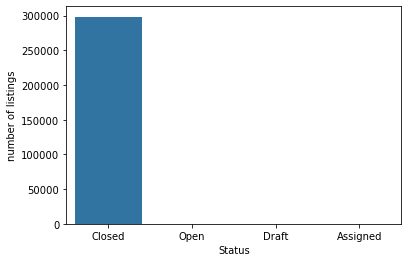

In [12]:
def count_plot(name,ylabel):
    '''Plot the count of number of listings of different service request as per the status'''
    
    sns.countplot(name)
    plt.ylabel(ylabel)
    plt.show()
count_plot(df_clean["Status"],'number of listings')

<b>Most of the cases are closed.</b>

<b> 2nd conclusion</b>

In [13]:
df_complaints=df_clean.dropna(subset=["Complaint Type"])
df_complaints_group=df_complaints.groupby("Complaint Type")

df_complaints_sort = df_complaints_group.size().sort_values(ascending = False)
df_complaints_sort = df_complaints_sort.to_frame('count').reset_index()

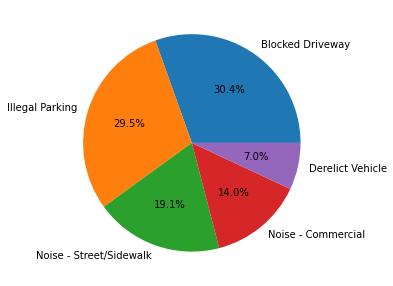

In [14]:
# see how the number of major complaints vary
df_complaints_plot =  df_complaints_sort.head(5)
plt.figure(figsize=(5,5))
plt.pie(df_complaints_plot['count'],labels=df_complaints_plot["Complaint Type"], autopct="%1.1f%%")
plt.show()

<b> Two of the complaints 'Blocked Driveway' and 'Illegal Parking' make more than 50 percentile </b>

In [15]:
df_clean['Longitude'].isnull().sum()

1432

In [16]:
df_clean['Latitude'].isnull().sum()

1432

In [17]:
df_clean.shape

(298534, 55)

In [18]:
df_clean['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [19]:
df_clean['City'].value_counts()[:8]

BROOKLYN         98295
NEW YORK         65972
BRONX            40697
STATEN ISLAND    12338
JAMAICA           7294
ASTORIA           6330
FLUSHING          5970
RIDGEWOOD         5162
Name: City, dtype: int64

<b> 3rd Conclusion</b>

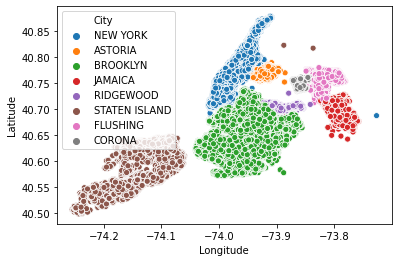

In [20]:
#it shows uniform distribution in 8 cities which has the  highest requests, just the scatterplot doesn't show any difference
df_city= df_clean[['Longitude','Latitude','City']].dropna()
df_lati_longi_city = df_city[df_city["City"].isin(['BROOKLYN','NEW YORK','STATEN ISLAND','JAMAICA','ASTORIA','FLUSHING','RIDGEWOOD','CORONA','WOODSIDE '])]
sns.scatterplot(x="Longitude", y="Latitude", data=df_lati_longi_city, hue= 'City',)

<b> We can't distinguish just from the scatter plot the concentration of the complaints </b>

(-74.28136187958134, -73.70001938041867, 40.480196892, 40.896826907999994)

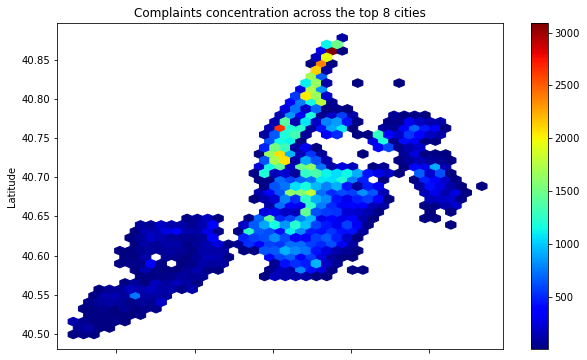

In [21]:
df_lati_longi_city.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across the top 8 cities', figsize=(10,6)).axis('equal')

<b>There is some hotspots in newyork and brooklyn but other places we see the uniform number of complaints</b>

In [22]:
df['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Ferry                              1
Terminal                           1
Park                               1
Name: Location Type, dtype: int64

<b>4th conclusion</b>

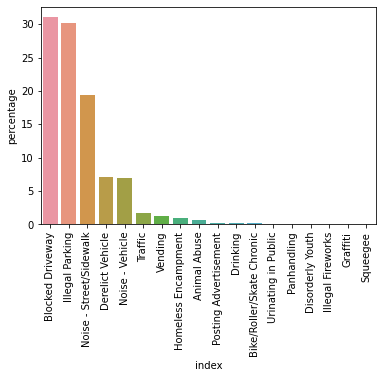

In [23]:
#Shows how the number of listing of complaint vary with in the Street/Sidewalk with the highest number.
occupation_counts = df_clean.groupby(['Location Type'])['Complaint Type']
plot_street_sidewalk = occupation_counts.get_group('Street/Sidewalk').value_counts(normalize=True).rename('percentage').mul(100).reset_index()
p = sns.barplot(x = 'index', y  ='percentage', data=plot_street_sidewalk)
_ = plt.setp(p.get_xticklabels(), rotation = 90)

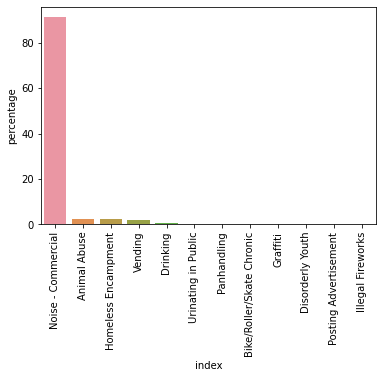

In [24]:
#Show how the number of listing of complaint vary with in the Store/Commercial.
occupation_counts = df_clean.groupby(['Location Type'])['Complaint Type']
plot_street_sidewalk = occupation_counts.get_group('Store/Commercial').value_counts(normalize=True).rename('percentage').mul(100).reset_index()
p = sns.barplot(x = 'index', y  ='percentage', data=plot_street_sidewalk)
_ = plt.setp(p.get_xticklabels(), rotation = 90)

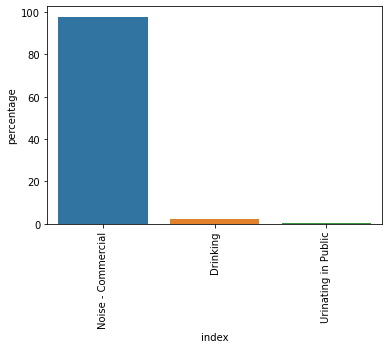

In [25]:
#Show how the number of listing of complaint vary with in the Store/Commerciale Store/Commercial.
occupation_counts = df_clean.groupby(['Location Type'])['Complaint Type']
plot_street_sidewalk = occupation_counts.get_group('Club/Bar/Restaurant').value_counts(normalize=True).rename('percentage').mul(100).reset_index()
p = sns.barplot(x = 'index', y  ='percentage', data=plot_street_sidewalk)
_ = plt.setp(p.get_xticklabels(), rotation = 90)

<b>Complaint Types are widely varying with the Location Type</b>

<b>Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.</b>

In [108]:
df_clean_order = df_clean[['Location Type','Complaint Type','Request_Closing_hours']]

In [109]:
df_clean_order['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', nan, 'Park'],
      dtype=object)

In [110]:
df_clean_order = df.loc[df['Location Type'] != 'nan']

In [111]:
df_clean_order_mean = df_clean_ordr.groupby(['Location Type','Complaint Type'])['Request_Closing_hours'].mean()

In [113]:
df_clean_order_mean.head(30)

Location Type               Complaint Type           
Bridge                      Homeless Encampment          4.000000
Club/Bar/Restaurant         Drinking                     4.528767
                            Noise - Commercial           3.406686
                            Urinating in Public          5.047619
Commercial                  Animal Abuse                 5.016129
Highway                     Derelict Vehicle             5.000000
                            Homeless Encampment          3.733333
                            Traffic                      3.822581
House and Store             Animal Abuse                 4.989247
House of Worship            Noise - House of Worship     3.489752
Park                        Animal in a Park             1.000000
Park/Playground             Animal Abuse                 3.819672
                            Drinking                     3.928571
                            Homeless Encampment          4.303116
                      

<b> The response time for different complaints at different location </b>

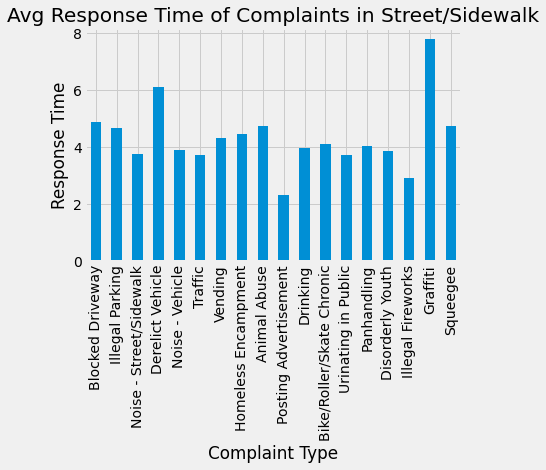

In [114]:
import matplotlib.ticker as ticker
df_Street = df_clean[df_clean['Location Type']=='Street/Sidewalk']
Complaint_time = df_Street.groupby('Complaint Type')['Request_Closing_hours'].mean()
frequent = df_Street['Complaint Type'].value_counts().head(20)
var1 = Complaint_time.loc[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Response Time')
ax1.set_title("Avg Response Time of Complaints in Street/Sidewalk")
#tick_spacing = 1
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(20).plot(kind='bar')

In [ ]:
#df_t_store = df_clean_order[df_clean_order['Location Type'] == 'Store/Commercial'].groupby('Complaint Type')['Request_Closing_hours'].mean()
#df_t_store.plot.bar(title = 'Mean response time for complaint types at Store/Commercial')

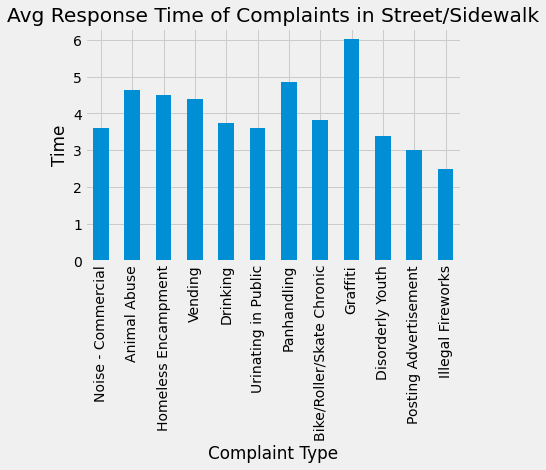

In [41]:
import matplotlib.ticker as ticker
df_Brooklyn = df_perfect[df_perfect['Location Type']=='Store/Commercial']
Agency_time = df_Brooklyn.groupby('Complaint Type')['Request_Closing_hours'].mean()
frequent = df_Brooklyn['Complaint Type'].value_counts().head(20)
var1 = Agency_time.loc[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Time')
ax1.set_title("Avg Response Time of Complaints in Street/Sidewalk")
tick_spacing = 1
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(20).plot(kind='bar')

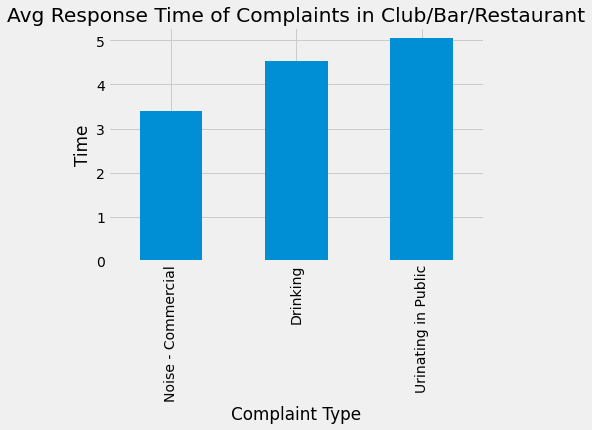

In [43]:
import matplotlib.ticker as ticker
df_Brooklyn = df_perfect[df_perfect['Location Type']=='Club/Bar/Restaurant']
Agency_time = df_Brooklyn.groupby('Complaint Type')['Request_Closing_hours'].mean()
frequent = df_Brooklyn['Complaint Type'].value_counts().head(20)
var1 = Agency_time.loc[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Time')
ax1.set_title("Avg Response Time of Complaints in Club/Bar/Restaurant")
tick_spacing = 1
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var1.head(20).plot(kind='bar')

<b> Most of the complaints in major Location Type are closed within few hours</b>

<b> Average respose time across complaint type is similar or not?? </b>

H0 null hypothesis = Average resoponse time of different complaint type is similar
H1 Alternative hypotheis = Average response time of different complaint type is not similar

In [128]:
df_clean_order = df_clean[['Complaint Type','Request_Closing_hours']]

In [129]:
df_clean_order_mean = df_clean_order.groupby('Complaint Type')['Request_Closing_hours'].mean()

In [137]:
df_clean_order_mean

Complaint Type
Agency Issues                5.666667
Animal Abuse                 5.129763
Animal in a Park             1.000000
Bike/Roller/Skate Chronic    4.049528
Blocked Driveway             4.886903
Derelict Vehicle             6.102229
Disorderly Youth             3.965035
Drinking                     4.123922
Graffiti                     6.168142
Homeless Encampment          4.602355
Illegal Fireworks            3.166667
Illegal Parking              4.652123
Noise - Commercial           3.506313
Noise - House of Worship     3.486545
Noise - Park                 3.775236
Noise - Street/Sidewalk      3.737270
Noise - Vehicle              3.889332
Panhandling                  4.226230
Posting Advertisement        2.467593
Squeegee                     4.750000
Traffic                      3.714190
Urinating in Public          3.934122
Vending                      4.311989
Name: Request_Closing_hours, dtype: float64

In [131]:
df_clean_order_std = df_clean_order.groupby('Complaint Type')['Request_Closing_hours'].std()

In [132]:
df_clean_order_std

Complaint Type
Agency Issues                3.559026
Animal Abuse                 4.260767
Animal in a Park                  NaN
Bike/Roller/Skate Chronic    3.342526
Blocked Driveway             3.996810
Derelict Vehicle             5.194200
Disorderly Youth             3.435445
Drinking                     3.479297
Graffiti                     4.745115
Homeless Encampment          3.927189
Illegal Fireworks            2.986329
Illegal Parking              3.927272
Noise - Commercial           3.058363
Noise - House of Worship     3.264570
Noise - Park                 3.293744
Noise - Street/Sidewalk      3.318065
Noise - Vehicle              3.378749
Panhandling                  3.617115
Posting Advertisement        2.228562
Squeegee                     2.629956
Traffic                      3.497138
Urinating in Public          3.511266
Vending                      3.699385
Name: Request_Closing_hours, dtype: float64

In [133]:
df_clean_order_mean.mean()

4.144006597859767

In [134]:
df_clean_order_mean.std()

1.1235094505747591

In [135]:
#The standard deviation is like one 1 hours

In [139]:
df_clean_order['Zscore'] = df_clean_order.groupby('Complaint Type').Request_Closing_hours.apply(lambda x: x.div(x.mean()))

/opt/anaconda3/envs/Py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_clean_order

Complaint Type  Request_Closing_hours    Zscore
0       Noise - Street/Sidewalk                      1  0.267575
1              Blocked Driveway                      2  0.409257
2              Blocked Driveway                      5  1.023143
3               Illegal Parking                      8  1.719645
4               Illegal Parking                      4  0.859823
...                         ...                    ...       ...
300692       Noise - Commercial                      1  0.285200
300694         Blocked Driveway                      3  0.613886
300695       Noise - Commercial                      4  1.140800
300696       Noise - Commercial                      5  1.425999
300697       Noise - Commercial                      5  1.425999

[298534 rows x 3 columns]